In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import csv

from statistics import mean

from keras.layers import Input, Dense
from keras.models import Model
from numpy import linalg as LA
import sklearn
from sklearn import metrics
from scipy.signal import find_peaks
import csv
from itertools import zip_longest


Using TensorFlow backend.


Data_files/U2_LIHF_itd_file.csv
number of unique ID=45
sum of bucket length=9721


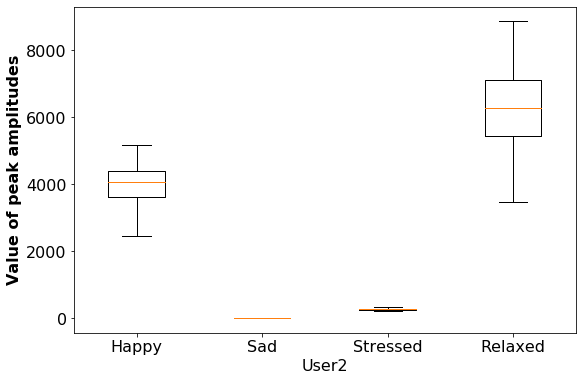

In [11]:
usr_dir="Data_files/"
for user in range(2,3,1):
    usr_file=usr_dir+"U"+str(user)+"_LIHF_itd_file.csv"
    
    
    happy_bucket=[]
    sad_bucket=[]
    stressed_bucket=[]
    relax_bucket=[]
    
    print(usr_file)
    dataset=pd.read_csv(usr_file,header=None)
    dataframe=dataset.values
    
    #print("row_number="+str(dataframe.shape[0]))
    
    # value list holds unique id 
    value_list=[]
    for i in range(dataframe.shape[0]):
        value_list.append(dataframe[i][0])
        
    ID_list=list(set(value_list))
    ID_list.sort()
    print("number of unique ID="+str(len(ID_list)))
    start=0
    next_start=0
    # traverse the whole list and add list of ITD values in emotion list
    for i in range(len(ID_list)):
        ID_number=ID_list[i]
        #print("ID_number="+str(ID_number))
        ITD_values=[]
        
        for j in range(start,dataframe.shape[0],1):
            if(dataframe[j][0]==ID_number):
                ITD_values.append(dataframe[j][2])
                next_start=next_start+1
            else:
                start=next_start
                #print(next_start)
                break
        if(dataframe[j-1][4]==2 and len(ITD_values)>3):
             happy_bucket=happy_bucket+ITD_values
        if(dataframe[j-1][4]==-2 and len(ITD_values)>3):
             sad_bucket=sad_bucket+ITD_values
        if(dataframe[j-1][4]==1 and len(ITD_values)>3):
             #stressed_bucket.append(list(ITD_values))
            stressed_bucket= stressed_bucket+ITD_values  
        if(dataframe[j-1][4]==0 and len(ITD_values)>3):
            #relax_bucket.append(list(ITD_values))
            relax_bucket=relax_bucket+ITD_values
        #print("ID_number="+str(ID_number)+","+"length of list="+str(len(ITD_values)))
    print("sum of bucket length="+str(len(happy_bucket)+len(sad_bucket)+len(stressed_bucket)+len(relax_bucket)))
    count_ITD_list=len(happy_bucket)+len(sad_bucket)+len(stressed_bucket)+len(relax_bucket)
    
    #########################################################
    happy_fft=[]
    sad_fft=[]
    stressed_fft=[]
    relaxed_fft=[]
    happy_sp=0
    list_length=[]
    data_to_plot=[]
    data_to_plot2=[]
    emotions=[]
    if(len(happy_bucket)!=0):
        #print("happy_bucket="+str(i)+","+"length="+str(len(happy_bucket[i])))
        
        signal=np.array(happy_bucket,dtype=float)
        sp=np.fft.rfft(signal)
        sp=np.abs(sp)
        peaks,_=find_peaks(sp)
        for i in range(len(peaks)):
            happy_fft.append(sp[peaks[i]])
      
        data_to_plot.append(np.array(happy_fft))
        data_to_plot2.append(list(happy_fft))
        emotions.append("Happy")
    sad_sp=0    
    if (len(sad_bucket)!=0):
        
        signal=np.array(sad_bucket,dtype=float)
        
        sp=np.fft.rfft(signal)
        sp=np.abs(sp)
        peaks,_=find_peaks(sp)
        for i in range(len(peaks)):
            sad_fft.append(sp[peaks[i]])
       
        #sad_fft=sad_fft+list(np.abs(sp)) 
        #sad_fft.append(mean(list(np.abs(sp))))
          
        data_to_plot.append(np.array(sad_fft))
        data_to_plot2.append(list(sad_fft))
        emotions.append("Sad")
    stressed_sp=0    
    if(len(stressed_bucket)!=0):
        
        
        signal=np.array(stressed_bucket,dtype=float)
        
        sp=np.fft.rfft(signal)
        sp=np.abs(sp)
        #stressed_fft.append(list(np.abs(sp))) 
        peaks,_=find_peaks(sp)
        for i in range(len(peaks)):
            stressed_fft.append(sp[peaks[i]])
       
        data_to_plot.append(np.array(stressed_fft))
        data_to_plot2.append(list(stressed_fft))
        #stressed_fft.append(mean(list(np.abs(sp))))
        emotions.append("Stressed")
    
    relax_sp=0    
    if (len(relax_bucket)!=0):
       
        signal=np.array(relax_bucket,dtype=float)
       
        sp=np.fft.rfft(signal)
        sp=np.abs(sp)
        peaks,_=find_peaks(sp)
        for i in range(len(peaks)):
            relaxed_fft.append(sp[peaks[i]])
        #relaxed_fft=relaxed_fft+list(np.abs(sp))   
        #relaxed_fft.append(mean(list(np.abs(sp))))
        data_to_plot.append(np.array(relaxed_fft))
        data_to_plot2.append(list(relaxed_fft))
        emotions.append("Relaxed")
    # this part is for writting peak amplitudes list for every emotion of different length in csv 
    '''
    print(len(data_to_plot2))
    export_data = zip_longest(*data_to_plot2, fillvalue = '')
    with open("Result_Folder/Peak_amplitude/All_users/user"+str(user)+".csv", 'w', newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerow(tuple(emotions))
        wr.writerows(export_data)
    
    
    relax_itd=np.array(stressed_fft)
    fig1, ax1 = plt.subplots()
    ax1.set_title('Basic Plot')
    ax1.boxplot(relax_itd)
    '''
    
    # this part for plotting
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    #ax.set_ylim(10,100)
    # Create the boxplot
    bp = ax.boxplot(data_to_plot,0,'')
    #ax.boxplot(data_to_plot)
    # Custom x-axis labels
    ax.set_xticklabels(['Happy', 'Sad', 'Stressed', 'Relaxed'])
    ax.set_ylabel('Value of peak amplitudes',fontsize=16,fontweight='bold')
    ax.set_xlabel('User2',fontsize=16)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    # Save the figure
    fig.savefig('user2.png', bbox_inches='tight')
    